# Predicting whether or not a patient has heart disease

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
 - 0: Typical angina (condition involving chest pain): chest pain related decrease blood supply to the heart
 - 1: Atypical angina: chest pain not related to heart
 - 2: Non-anginal pain: typically esophageal spasms (non heart related)
 - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
 - serum = LDL + HDL + .2 * triglycerides
 - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
 - 0: Nothing to note
 - 1: ST-T Wave abnormality
  - can range from mild symptoms to severe problems
  - signals non-normal heart beat
 - 2: Possible or definite left ventricular hypertrophy
  - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
 - looks at stress of heart during excercise
 - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 - 0: Upsloping: better heart rate with excercise (uncommon)
 - 1: Flatsloping: minimal change (typical healthy heart)
 - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 - colored vessel means the doctor can see the blood passing through
 - the more blood movement the better (no clots)
13. thal - thalium stress result
 - 1,3: normal
 - 6: fixed defect: used to be defect but ok now
 - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
    #allows our plots to appear inside the notebook

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.shape #rows, columns

(303, 14)

### Explore Data

In [4]:
# see how many people have heart disease and how many don't
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

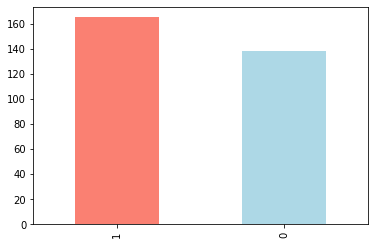

In [5]:
heart_disease['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# see how many missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 
- Compare sex attribute to target

In [9]:
heart_disease.sex.value_counts()
#1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column
pd.crosstab(heart_disease['target'], heart_disease['sex'])

    #72/96 women have hd
    #93/207 males have hd

sex,0,1
target,,
0,24,114
1,72,93


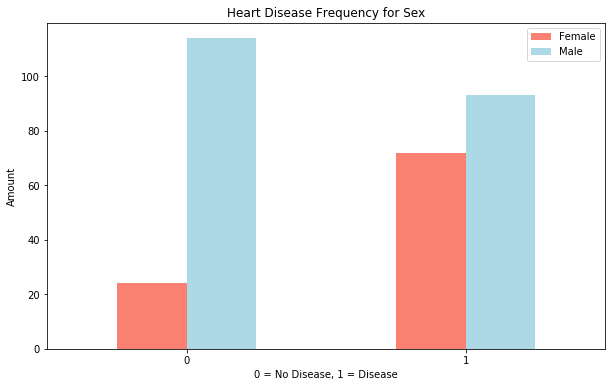

In [11]:
# create a plot of crosstab
pd.crosstab(heart_disease['target'], heart_disease['sex']).plot(kind = 'bar',
                                                                figsize =(10,6),
                                                                color = ['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);

plt.xticks(rotation = 0); #flips 0 and 1 on xaxis upright

### Age vs Max Heart Rate (thalach) for Heart Disease

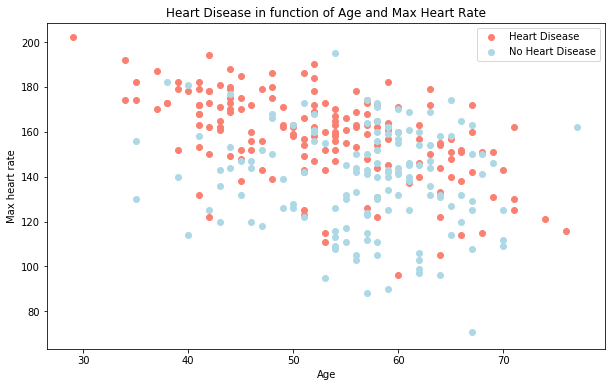

In [12]:
plt.figure(figsize=(10, 6))

#scatter plot with positive examples
    #find in age col and thalach col where target = 1
plt.scatter(heart_disease.age[heart_disease.target == 1],
            heart_disease.thalach[heart_disease.target == 1],
            c = 'salmon') 

#scatter with neg examples
plt.scatter(heart_disease.age[heart_disease.target == 0],
            heart_disease.thalach[heart_disease.target == 0],
            c = 'lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Heart Disease', 'No Heart Disease']);
#hard to find pattern so we need to use ML model

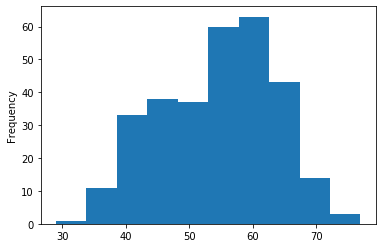

In [13]:
# check the distribution of the age column with a histogram
heart_disease['age'].plot.hist();
    #we have a normal distribution

### Use Chest Pain type to look at Heart Disease Frequency
3. cp - chest pain type
 - 0: Typical angina (condition involving chest pain): chest pain related decrease blood supply to the heart
 - 1: Atypical angina: chest pain not related to heart
 - 2: Non-anginal pain: typically esophageal spasms (non heart related)
 - 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(heart_disease['cp'], heart_disease['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


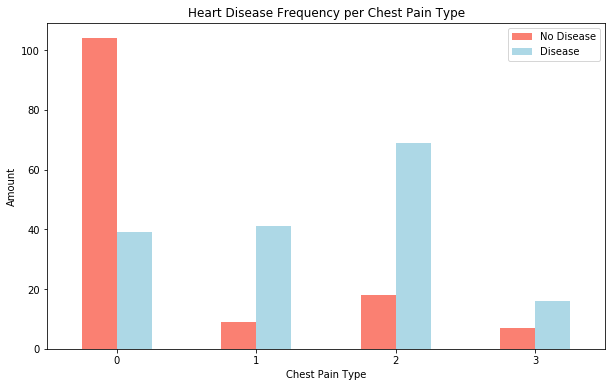

In [15]:
pd.crosstab(heart_disease['cp'], heart_disease['target']).plot(kind = 'bar',
                                                               figsize =(10, 6),
                                                               color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# make a correlation matrix (compare each col to each other)
heart_disease.corr() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


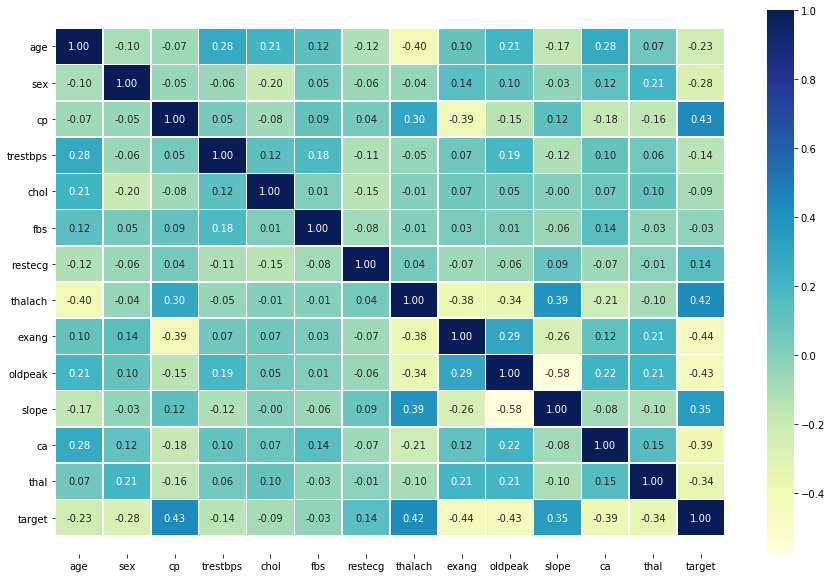

In [18]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True, #annotation
                 linewidths=0.5,
                 fmt='.2f', #format 2 dec places
                 cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

Higher pos value means potential pos correlation. (chest pain has a 0.43 correlation with target) Higher neg value means potential neg correlation. 

### Modeling

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# split data into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# split data into train and test sets
np.random.seed(42)

# split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Try 3 different ML models for classification
1. Logistics Regression (linear model for classification)
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [26]:
# put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different scikitlearn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: ltest labels
    """
    # set random seed
    np.random.seed(42)
    # make an empty dictionary to keep model scores
    model_scores = {}
    # loop through models
        # name is key, models is value in dict
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
            # name is 'Logistic regression' first
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

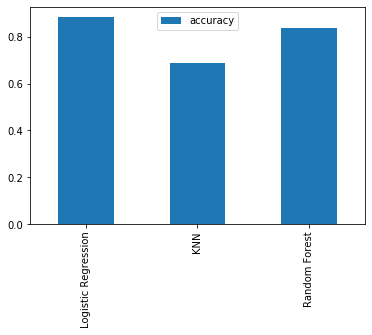

In [29]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar(); #transposing makes the graph look nicer

### Hyperparameter tuning

In [30]:
# tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i) #adjust parameters
    # fit the algorithm
    knn.fit(X_train, y_train)
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


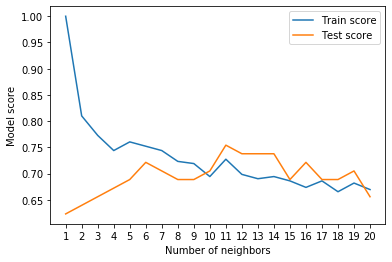

In [33]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

Tune LogisticRegression() and RandomForestClassifier()

- n fold cross validation is where model is trained on n different versions of training data, and evaluated on n different versions of the test data

In [34]:
# logspace returns numbers spaced evenly on a log scale
        # 20 numbers between -4 and 4
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [35]:
# numbers from 10 to 1000 spaced 50 apart
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [36]:
# researched best parameters to tune when using Logistic Regression
 # and Random Forest

# create a hyperparameter grid for Logistic Regression
    # 'C' = inverse of regularization strength (must be float)
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# create a hyperparameter grid for RandomForestClassifier
    #n_estimators is how many trees we have in our forest
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

#### Tune LogisticRegression()

In [37]:
np.random.seed(42)

# setup random hyperparameter search for Logistic Regression
    #cross validate LogisticRegression model 5 times for 20 iterations
    #rs = randomsearch
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid, 
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [38]:
# check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
# evaluate score on our test data
rs_log_reg.score(X_test, y_test)
    # tuned 2 hyperparamters but got same 88.5% accuracy

0.8852459016393442

In [40]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Tune RandomForestClassifier()

In [41]:
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
    #cross validate LogisticRegression model 5 times for 20 iterations
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid, 
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
# find the best hyperparamters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)
    # 3% increase in accuracy

0.8688524590163934

In [44]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, let's try to improve them again using GridSearchCV 

In [45]:
# different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid, #called param_distributions in RandomSearchCV
                          cv = 5,
                          verbose = True)

# fit frid hyperparamter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [46]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)
    # we get same score as before

0.8852459016393442

In [48]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Evaluating our tuned ML classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [49]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

- ROC Curve is created by plotting the true positive rate against the false positive rate

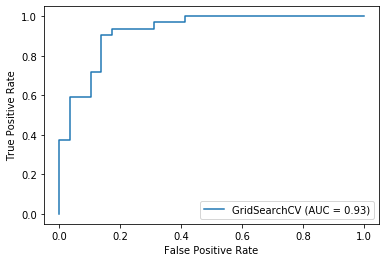

In [52]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test) 
    #we get a score of 0.93 when normally just guessing 0.5

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


![](confusionmatrix1.png)
 - True positive = model predicts 1 when truth is 1
 - False positive = model predicts 1 when truth is 0
 - True negative = model predicts 0 when truth is 0
 - False negative = model predicts 0 when truth is 1

- Precision = proportion of positive identification (model predicts heart disease when patient has heart disease. 0 False positives)
- Recall = proportion of actual positives which were correctly classified (0 False negatives)
- F1 = combo of precision and recall

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [55]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

In [58]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [63]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [62]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                         X, 
                         y,
                         cv = 5,
                         scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [64]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                         X, 
                         y,
                         cv = 5,
                         scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [65]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf,
                         X, 
                         y,
                         cv = 5,
                         scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

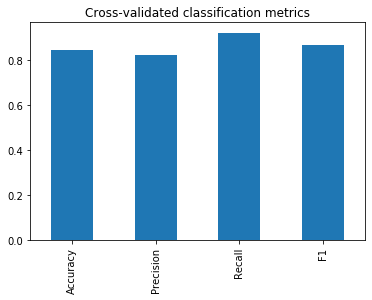

In [68]:
# visualize cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                           index = [0])

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                      legend = False);
    #transposing makes graph look nicer

### Feature importance for LogisticRegression model
- Feature importance is which features contributed most to the outcomes of the model and how did they contribute?

In [74]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [75]:
# fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(X_train, y_train);

In [77]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# check coef_
    # gives us value of how each feature contributes to our 'target' col
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [78]:
# match coef's of features to columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

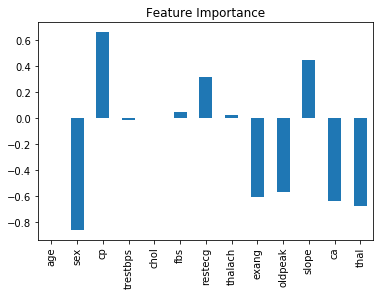

In [80]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

- We can see that chest pain type and slope contribute most to our model

slope - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

In [81]:
pd.crosstab(heart_disease['slope'], heart_disease['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope = 2 means unhealthy heart so more likely to predict heart disease